# Import Needed Modules

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import os
import shutil
import PIL
import cv2
import random
import dlib
from scipy import ndimage
from sklearn.metrics import mean_squared_error
from datetime import datetime

## Set things up

In [47]:
RANDOM_SEED = 123

# Check Database
Do we have any problems?

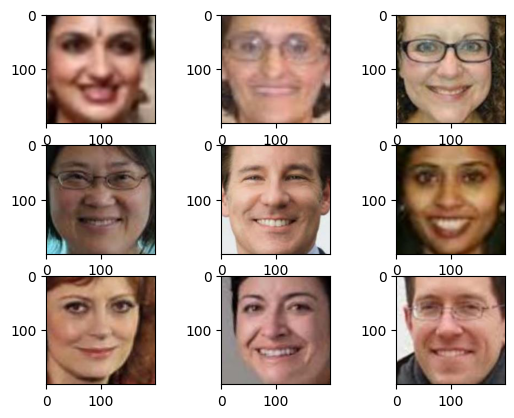

In [48]:
# define location of datasets
fa = 'datasets/face_age/'
fa_temp = 'datasets/face_age/039'

#plot 9 random images
fa_list = []


for (dirp, dirn, filen) in os.walk(fa_temp):
    fa_list.extend(random.sample(filen,9))
    break

break_iter = 0
for iter,file in enumerate(fa_list,9):
    plt.subplot(330 + 1 + (iter % 9))
    # define filename
    # load image pixels
    image = plt.imread(os.path.join(fa_temp,file))
    # plot raw pixel data
    plt.imshow(image)
    if break_iter >= 9:
        break
# show the figure
plt.show()

# Bring into Keras
The data is ready to go, just need to make sure i use a part of the data base

In [49]:
IMG_SIZE=64     #Img size
ROWS = 256      #Img size
COLS = 256      #Img size
CHANNELS = 3    #RGB
batch_size=64   #What was shown as a good number for back propogation in AlexNet



test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  fa,
  validation_split=0.1,
  subset="validation",
  seed=RANDOM_SEED,
  image_size=(ROWS, COLS),
  batch_size=batch_size)

Found 9778 files belonging to 99 classes.
Using 977 files for validation.


## Check that the data loaded correctly

99


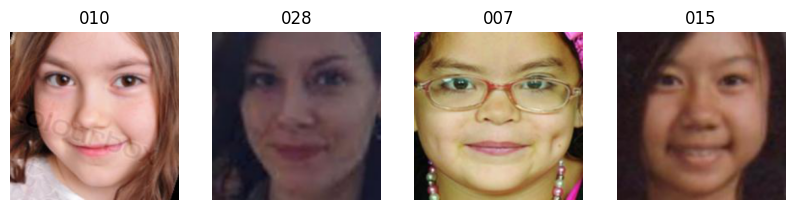

In [50]:
# Need the directories for the number
test_dir_names = list(os.listdir(fa))
print(len(test_dir_names))

# Needed for propper labeling
class_names = test_ds.class_names

# Check if it works
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(1,4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])  # Has weird internal organising, class names needed
        plt.axis("off")

In [51]:
#Check the labeling
print("Test shape: {}".format(images[1].shape))
print(class_names)

Test shape: (256, 256, 3)
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '095', '096', '099', '100', '101', '110']


In [52]:
# Create a new model instance
model = tf.keras.models.load_model('savedmodel_good')

model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mean_absolute_error']) 

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Mean Absolute Error (Lower Better): {test_accuracy:.2f}")
print(f"Loss: {test_loss:.4f}")

16/16 [==============================] - 18s 1s/step - loss: 456.5452 - mean_absolute_error: 14.5529
Mean Absolute Error (Lower Better): 14.55
Loss: 456.5452


1/1 [==============================] - 0s 315ms/step
0.9220079 at 1
1/1 [==============================] - 0s 303ms/step
1.4729763 at 1
1/1 [==============================] - 0s 252ms/step
0.8429123 at 1
1/1 [==============================] - 0s 236ms/step
12.780442 at 10
1/1 [==============================] - 0s 476ms/step
17.011936 at 10
1/1 [==============================] - 0s 254ms/step
27.88242 at 10
1/1 [==============================] - 0s 244ms/step
7.527968 at 11
1/1 [==============================] - 0s 258ms/step
18.477549 at 11
1/1 [==============================] - 0s 278ms/step
6.5013056 at 11
1/1 [==============================] - 0s 257ms/step
0.66846234 at 12
1/1 [==============================] - 0s 230ms/step
28.294912 at 12
1/1 [==============================] - 0s 435ms/step
16.712496 at 12
1/1 [==============================] - 0s 312ms/step
29.261057 at 13
1/1 [==============================] - 0s 241ms/step
6.422313 at 13
1/1 [==============================] - 

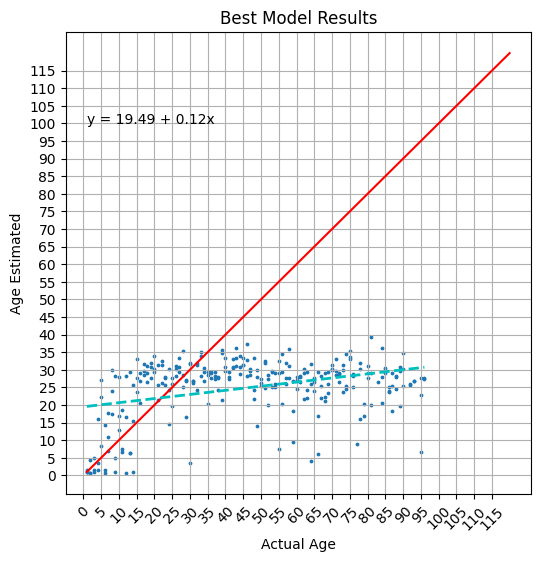

In [64]:
# Make a Plot to show difference

import random
import matplotlib.pyplot as plt

#fa = "data/test"

num_each = 1
x = []
y = []



for dir in os.listdir(fa):
    files = os.path.join(fa,dir)
    
    for intg,file in enumerate(os.listdir(files)):   
        ful_name = os.path.join(files,file)
        img = keras.preprocessing.image.load_img(
            ful_name, target_size=(ROWS, COLS))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        
        y.append(float(str(predictions)[2:-2]))
        x.append(int(dir))
        
        print(f"{float(str(predictions)[2:-2])} at {int(dir)}")
        
        if intg > num_each:
            break
        
npx = np.array(x)
npy = np.array(y)
        
#find line of best fit
a, b = np.polyfit(npx, npy, 1)

plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.scatter(x,y,s=3)
ax.plot([1, 2, 4, 50,100,120], [1, 2, 4, 50,100,120], c = "r")

ax.set_xlabel('Actual Age')
ax.set_ylabel('Age Estimated')
plt.xticks([i for i in range(0,120,5)] )
plt.yticks([i for i in range(0,120,5)] )
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.grid()
plt.plot(npx, a*npx+b, color='c', linestyle='--', linewidth=2)
plt.text(1, 100, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

plt.title("Best Model Results")

plt.show()